# Training Model

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(82, 82, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_data_dir = 'helmet_detection/train'
validation_data_dir = 'helmet_detection/validations'
nb_train_samples = 3202
nb_validation_samples = 220
epochs = 50
batch_size = 12

train_datagen = ImageDataGenerator(
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(82, 82),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(82, 82),
        batch_size=batch_size,
        class_mode='binary')

Found 3199 images belonging to 2 classes.
Found 219 images belonging to 2 classes.


In [3]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
mcp_save = ModelCheckpoint('helmet_detection_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')
# train the network
print("[INFO] training network...")
H = model.fit_generator(train_generator, 
                            steps_per_epoch=nb_train_samples // batch_size,
                            epochs=50,
                            validation_data=validation_generator,
                            validation_steps=nb_validation_samples // batch_size,
                            callbacks=[reduce_lr_loss,mcp_save],verbose=1)
#model.save("C:\\Users\\RGUKT\\Desktop\\RajHarry\\Haar\\realtime_object_recognition-master\\helmet_detection\\4-24_1.h5")
#model.save_weights('first_try.h5') 

[INFO] training network...


C:\Users\adity\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
266/266 [==============================] - 26s 95ms/step - loss: 1.9503 - accuracy: 0.7468 - val_loss: 0.3803 - val_accuracy: 0.8287
Epoch 2/50
266/266 [==============================] - 10s 39ms/step - loss: 0.3784 - accuracy: 0.8489 - val_loss: 0.3817 - val_accuracy: 0.8704
Epoch 3/50
266/266 [==============================] - 10s 39ms/step - loss: 0.3938 - accuracy: 0.8398 - val_loss: 0.2591 - val_accuracy: 0.9120
Epoch 4/50
266/266 [==============================] - 11s 39ms/step - loss: 0.3121 - accuracy: 0.8837 - val_loss: 0.2821 - val_accuracy: 0.9028
Epoch 5/50
266/266 [==============================] - 11s 40ms/step - loss: 0.2793 - accuracy: 0.8910 - val_loss: 0.3959 - val_accuracy: 0.8472
Epoch 6/50
266/266 [==============================] - 11s 40ms/step - loss: 0.2838 - accuracy: 0.8954 - val_loss: 0.3062 - val_accuracy: 0.8657
Epoch 7/50
266/266 [==============================] - 11s 40ms/step - loss: 0.2762 - accuracy: 0.8984 - val_loss: 0.2506 - val_accuracy:

In [9]:
model.save("C:\\zyx\\new_4-24-1(0.10 0.96 0.23 0.93).h5")

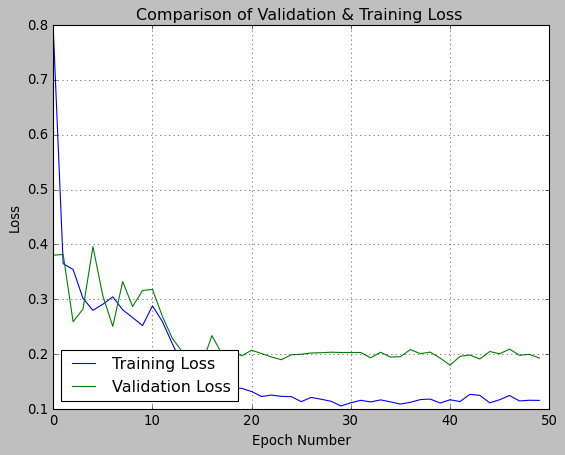

In [20]:
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use("classic")
plt.figure()
plt.grid()
N = 50
plt.plot(np.arange(0, N), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="Validation Loss")
#plt.plot(np.arange(0, N), H.history['accuracy'], label="Training Accuracy")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="Validation Accuracy")
plt.title("Comparison of Validation & Training Loss ")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("C:\\zyx\\fish_1.png")


# Predictions/Results

In [2]:
import os
import glob
import cv2
from keras.preprocessing import image
from keras.models import load_model
print(os.getcwd())
from PIL import Image
import numpy as np
import warnings
warnings.simplefilter('ignore')

Using TensorFlow backend.


C:\Users\RGUKT\Desktop\RajHarry\Haar\realtime_object_recognition-master


In [54]:
model = load_model('.mdl_wts.hdf5')#new_4-24-1(0.10 0.96 0.23 0.93).h5

In [55]:
l1 = [1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1]

In [56]:
len(l1)

42

In [5]:
import glob
from PIL import Image
pis=[]
files = glob.glob("Cluster_Dataset\\*.png")
#print(files,len(files))
#assert(False)
for file in files:
    im = image.load_img(file)
    width,height = im.size
    f, e = os.path.splitext(file)
    im = im.crop((1, 1, width, height//4))
    imResize = im.resize((160,160), Image.ANTIALIAS)
    imResize = imResize.convert('RGB')
    #imResize.save(f+'_1.png', 'PNG', quality=100)
    img = image.img_to_array(imResize)
    im_f = np.expand_dims(img,axis=0)
    result = model.predict(im_f)
    #print(result)
    #print(int(result[0][0]))
    pis.append(int(result[0][0]))
    #print(f.split('\\')[-1],result[0])
pis

[]

In [59]:
np.array(l1).ravel()

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [60]:
np.array(pis).ravel()

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [61]:
for i in range(len(files)):
    print(files[i].split('\\')[1]+ '==> ' + str(pis[i])+'==> '+str(l1[i]))

my_10.png==> 1==> 1
my_11.png==> 1==> 1
my_12.png==> 0==> 0
my_13.png==> 1==> 0
my_14.png==> 1==> 0
my_15.png==> 1==> 1
my_16.png==> 0==> 0
my_17.png==> 0==> 0
my_18.png==> 0==> 0
my_19.png==> 0==> 0
my_2.png==> 1==> 1
my_20.png==> 0==> 0
my_21.png==> 0==> 0
my_22.png==> 0==> 0
my_23.png==> 1==> 0
my_24.png==> 0==> 0
my_25.png==> 1==> 1
my_26.png==> 0==> 1
my_27.png==> 1==> 1
my_28.png==> 0==> 1
my_29.png==> 1==> 1
my_3.png==> 0==> 0
my_30.png==> 0==> 1
my_31.png==> 0==> 1
my_32.png==> 0==> 1
my_33.png==> 0==> 0
my_34.png==> 0==> 0
my_35.png==> 0==> 0
my_36.png==> 1==> 1
my_37.png==> 1==> 1
my_38.png==> 1==> 1
my_39.png==> 1==> 1
my_4.png==> 1==> 1
my_40.png==> 1==> 1
my_41.png==> 1==> 1
my_42.png==> 0==> 1
my_43.png==> 1==> 1
my_5.png==> 0==> 0
my_6.png==> 1==> 1
my_7.png==> 1==> 1
my_8.png==> 1==> 1
my_9.png==> 0==> 1


In [62]:
print(pis)

[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In [63]:
print(l1)

[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [64]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

In [65]:
p = np.array(pis).reshape(-1,1)
l = np.array(l1).reshape(-1,1)

In [72]:
accuracy_score(l1,pis)

0.953452556


In [11]:
import glob
from PIL import Image
from keras.preprocessing import image
import os
user_preds = []
h1 = 0
h2 = 0
user_folders = glob.glob("Cluster_Dataset\\*[!.png]")
print(user_folders)
for user in user_folders:
    uname = user.split('\\')[-1]
    print(uname,end=' => ')
    cropped_files = glob.glob(user+'\\cropped\\*')
    print('[',end='')
    res = 'no_helmet'
    for file in cropped_files:
        im = image.load_img(file)
        width,height = im.size
        f, e = os.path.splitext(file)
        im = im.crop((1, 1, width, height//4))
        imResize = im.resize((82,82), Image.ANTIALIAS)
        imResize = imResize.convert('RGB')
        #imResize.save(f+'_1.png', 'PNG', quality=100)
        img = image.img_to_array(imResize)
        im_f = np.expand_dims(img,axis=0)
        result = model.predict(im_f)
        if(result[0][0]>=0.6):
            res='helmet'
        print(result[0][0],end=' ')
    print(']',end=' => ')
    print(res,end='\n')
    if(res == 'helmet'):
        print
        pis.append(1)
    elif(res == 'no_helmet'):
        pis.append(0)
pis

['Cluster_Dataset\\user_0', 'Cluster_Dataset\\user_1', 'Cluster_Dataset\\user_10', 'Cluster_Dataset\\user_11', 'Cluster_Dataset\\user_12', 'Cluster_Dataset\\user_13', 'Cluster_Dataset\\user_14', 'Cluster_Dataset\\user_15', 'Cluster_Dataset\\user_16', 'Cluster_Dataset\\user_17', 'Cluster_Dataset\\user_2', 'Cluster_Dataset\\user_3', 'Cluster_Dataset\\user_4', 'Cluster_Dataset\\user_5', 'Cluster_Dataset\\user_6', 'Cluster_Dataset\\user_7', 'Cluster_Dataset\\user_8', 'Cluster_Dataset\\user_9']
user_0 => [0.8885751 0.11247579 ] => helmet
user_1 => [0.35219118 0.359995 ] => no_helmet
user_10 => [0.0048504844 0.73173517 0.0072540576 ] => helmet
user_11 => [0.969127 0.43975362 0.5826954 ] => helmet
user_12 => [0.046493817 0.7159242 0.8116432 ] => helmet
user_13 => [0.9998186 0.9936906 ] => helmet
user_14 => [0.21087204 0.691348 0.1737808 ] => helmet
user_15 => [0.9992084 0.99527586 0.99719584 ] => helmet
user_16 => [0.41272527 0.8756398 ] => helmet
user_17 => [0.8009035 0.024833657 0.03219691 

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [ ]:
l1 = [1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1]
len(l1)

# Remove Images

In [9]:
file_names = []
files=  glob.glob('Cluster_Dataset/*_1.png')
for file in files:
    os.remove(file)
    #file_names.append(file.split('\\')[-1].split('.')[0].replace('h ',''))